<Axes: >

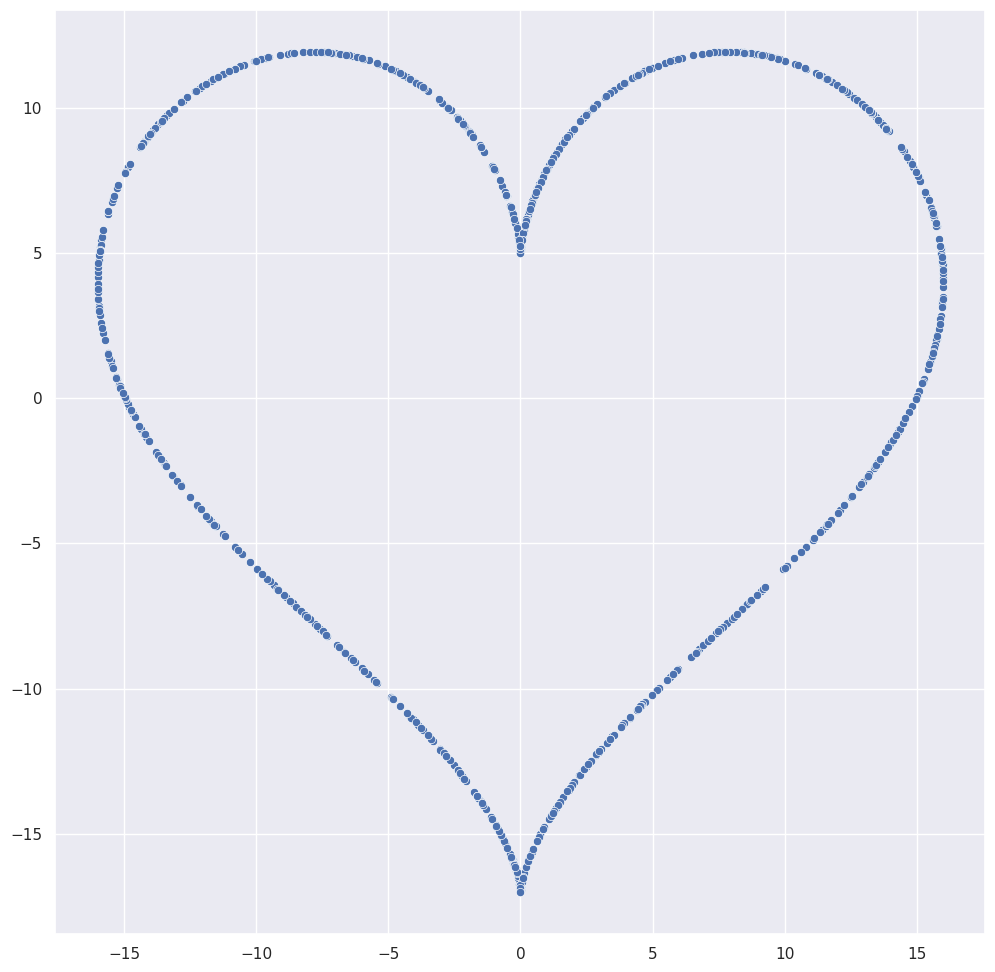

In [9]:
#%% packages
import torch
from torch.utils.data import DataLoader
from torch import nn

import math
import matplotlib.pyplot as plt
import numpy as np
from random import uniform

import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})
#%% create training data
TRAIN_DATA_COUNT = 1024
theta = np.array([uniform(0, 2 * np.pi) for _ in range(TRAIN_DATA_COUNT)]) # np.linspace(0, 2 * np.pi, 100)
# Generating x and y data
x = 16 * ( np.sin(theta) ** 3 )
y = 13 * np.cos(theta) - 5 * np.cos(2*theta) - 2 * np.cos(3*theta) - np.cos(4*theta)
sns.scatterplot(x=x, y=y)


In [10]:

#%% prepare tensors and dataloader
train_data = torch.Tensor(np.stack((x, y), axis=1))
train_data

tensor([[ 1.2981e+01, -2.8745e+00],
        [-9.5837e-03, -1.6890e+01],
        [ 4.4232e+00, -1.0724e+01],
        ...,
        [ 5.8934e-01,  7.1031e+00],
        [ 3.5024e-01,  6.5214e+00],
        [ 9.0220e-02, -1.6512e+01]])

In [11]:
train_labels = torch.zeros(TRAIN_DATA_COUNT)

train_labels

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [12]:


train_set = [
    (train_data[i], train_labels[i]) for i in range(TRAIN_DATA_COUNT)
]

train_set

[(tensor([12.9805, -2.8745]), tensor(0.)),
 (tensor([-9.5837e-03, -1.6890e+01]), tensor(0.)),
 (tensor([  4.4232, -10.7235]), tensor(0.)),
 (tensor([  0.0183, -16.8306]), tensor(0.)),
 (tensor([ 8.8970, 11.8512]), tensor(0.)),
 (tensor([ -0.2070, -16.1536]), tensor(0.)),
 (tensor([14.5606, -0.7205]), tensor(0.)),
 (tensor([-8.7987, 11.8640]), tensor(0.)),
 (tensor([2.3698, 9.6465]), tensor(0.)),
 (tensor([0.6445, 7.2214]), tensor(0.)),
 (tensor([11.3984, -4.5508]), tensor(0.)),
 (tensor([0.1345, 5.8246]), tensor(0.)),
 (tensor([  0.0451, -16.6917]), tensor(0.)),
 (tensor([-15.9085,   5.1639]), tensor(0.)),
 (tensor([15.0670,  7.6117]), tensor(0.)),
 (tensor([ 7.4087, -8.0961]), tensor(0.)),
 (tensor([ -2.9720, -12.1605]), tensor(0.)),
 (tensor([ -0.6793, -15.1492]), tensor(0.)),
 (tensor([ -2.2828, -12.9228]), tensor(0.)),
 (tensor([1.2866, 8.3427]), tensor(0.)),
 (tensor([-10.8964,  11.3118]), tensor(0.)),
 (tensor([-0.1927,  6.0400]), tensor(0.)),
 (tensor([ -3.2990, -11.8202]), tens

In [13]:


#  dataloader
BATCH_SIZE = 256
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)


In [14]:
#%% initialize discriminator and generator
discriminator = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

generator = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )



1000
Epoch 1000, Discriminator Loss 0.5775129199028015
Epoch 1000, Generator Loss 0.7864806652069092


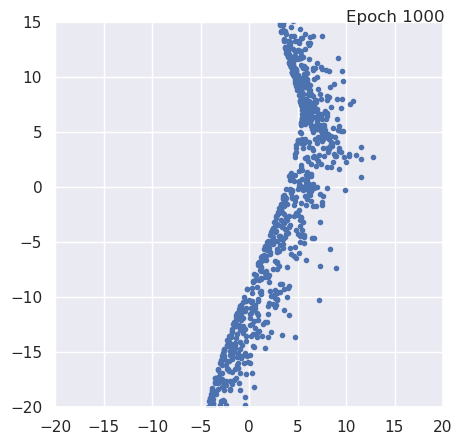

2000
Epoch 2000, Discriminator Loss 0.6898103952407837
Epoch 2000, Generator Loss 0.8274053335189819


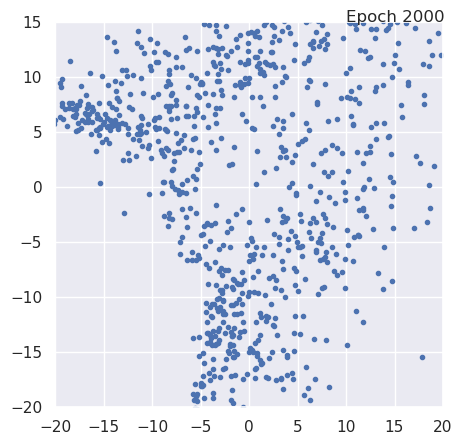

3000
Epoch 3000, Discriminator Loss 0.6888164281845093
Epoch 3000, Generator Loss 0.7196886539459229


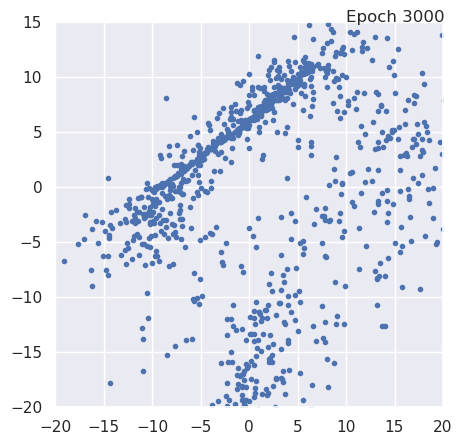

4000
Epoch 4000, Discriminator Loss 0.6908367872238159
Epoch 4000, Generator Loss 0.695572018623352


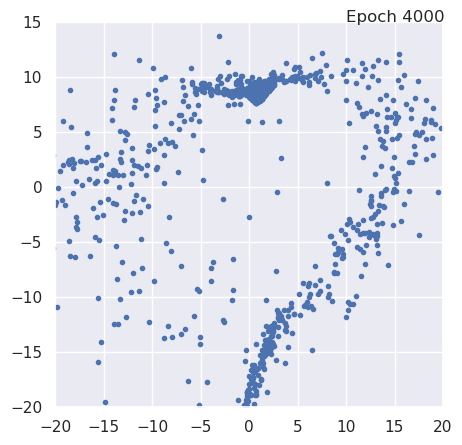

5000
Epoch 5000, Discriminator Loss 0.6928902864456177
Epoch 5000, Generator Loss 0.6951910257339478


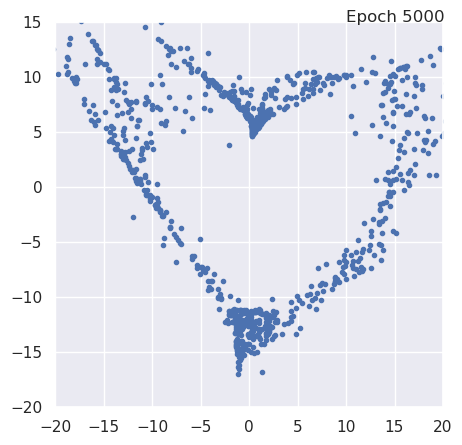

6000
Epoch 6000, Discriminator Loss 0.6935895681381226
Epoch 6000, Generator Loss 0.6897408962249756


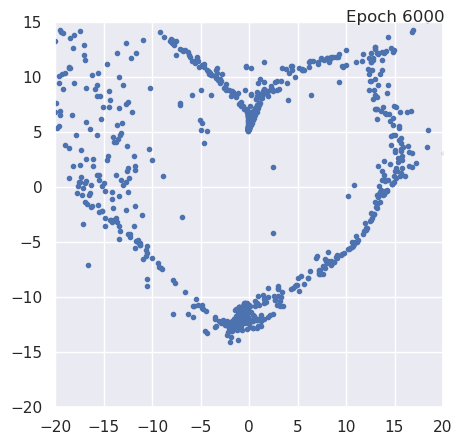

7000
Epoch 7000, Discriminator Loss 0.692663311958313
Epoch 7000, Generator Loss 0.6915370225906372


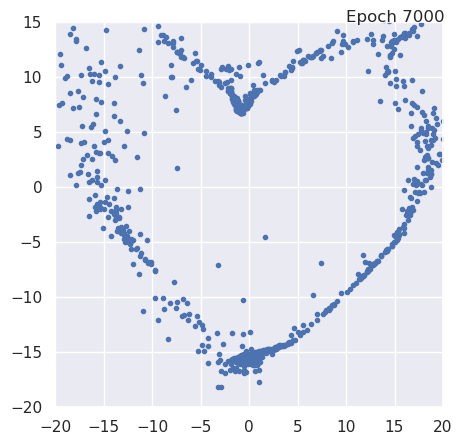

8000
Epoch 8000, Discriminator Loss 0.6927402019500732
Epoch 8000, Generator Loss 0.696352481842041


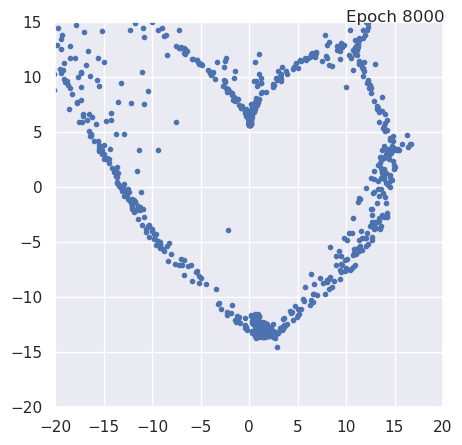

9000
Epoch 9000, Discriminator Loss 0.6929754018783569
Epoch 9000, Generator Loss 0.6944222450256348


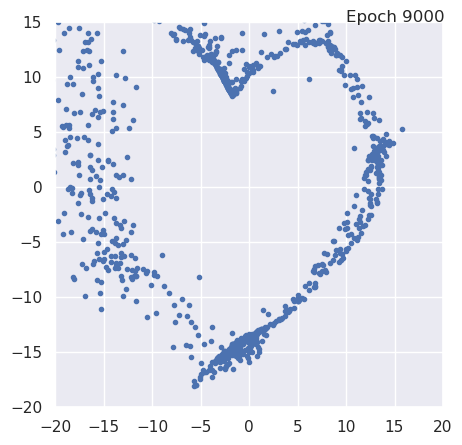

10000
Epoch 10000, Discriminator Loss 0.6921679973602295
Epoch 10000, Generator Loss 0.6907356977462769


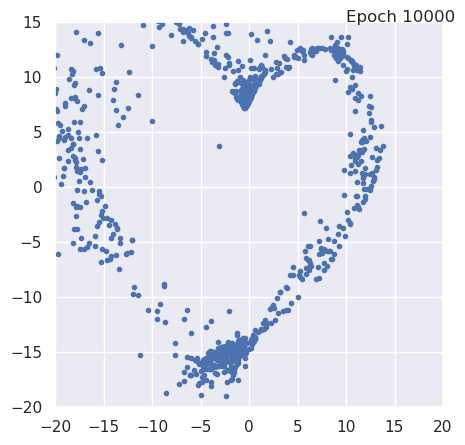

11000
Epoch 11000, Discriminator Loss 0.693131148815155
Epoch 11000, Generator Loss 0.6924879550933838


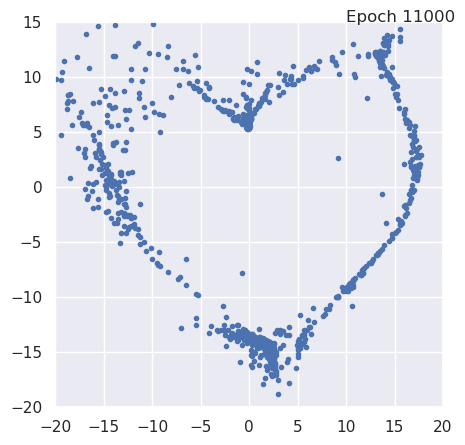

12000
Epoch 12000, Discriminator Loss 0.6931241750717163
Epoch 12000, Generator Loss 0.6926146745681763


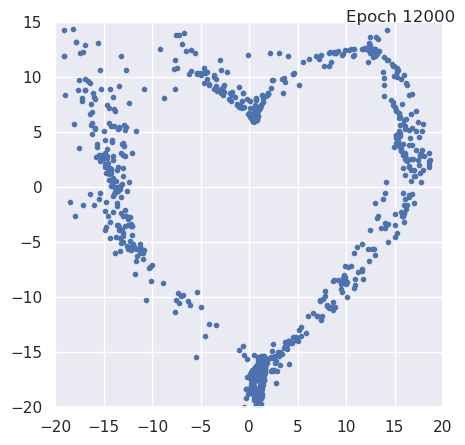

13000
Epoch 13000, Discriminator Loss 0.6930326223373413
Epoch 13000, Generator Loss 0.6927628517150879


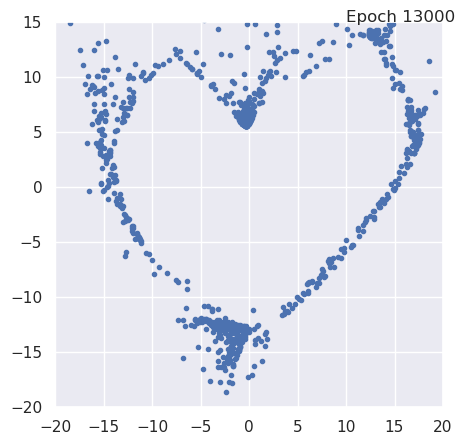

14000
Epoch 14000, Discriminator Loss 0.6934108734130859
Epoch 14000, Generator Loss 0.6931066513061523


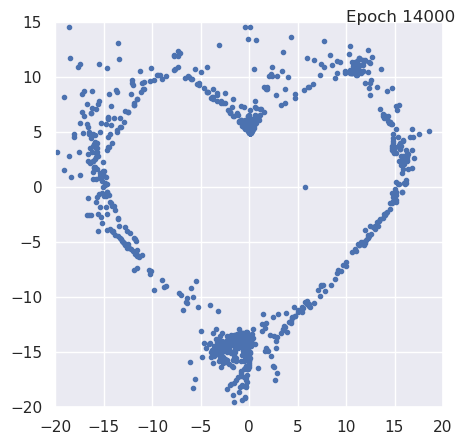

In [15]:
# %% training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

LR = 0.0001
NUM_EPOCHS = 15000
loss_function = nn.BCELoss()
optimizer_discriminator = torch.optim.Adam(discriminator.parameters())
optimizer_generator = torch.optim.Adam(generator.parameters())

discriminator.to(device)
generator.to(device)

for epoch in range(NUM_EPOCHS):
    for n, (real_samples, _) in enumerate(train_loader):
        real_samples = real_samples.to(device)
        # Data for training the discriminator
        real_samples_labels = torch.ones((BATCH_SIZE, 1)).to(device)
        latent_space_samples = torch.randn((BATCH_SIZE, 2)).to(device)

        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((BATCH_SIZE, 1)).to(device)
        
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        if epoch % 10 == 0:
            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples)
            loss_discriminator = loss_function(
                output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()

        if epoch % 2 == 1:
            # Data for training the generator
            latent_space_samples = torch.randn((BATCH_SIZE, 2)).to(device)

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples)
            output_discriminator_generated = discriminator(generated_samples)
            loss_generator = loss_function(
                output_discriminator_generated, real_samples_labels
            )
            loss_generator.backward()
            optimizer_generator.step()
    
    # Show progress
    if epoch % 1000 == 0 and epoch !=0 :
        print(epoch)
        print(f"Epoch {epoch}, Discriminator Loss {loss_discriminator}")
        print(f"Epoch {epoch}, Generator Loss {loss_generator}")
        with torch.no_grad():
            latent_space_samples = torch.randn(1000, 2).to(device)
            generated_samples = generator(latent_space_samples).detach().cpu()
        plt.figure(figsize=(5, 5))
        plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")
        plt.xlim((-20, 20))
        plt.ylim((-20, 15))
        plt.text(10, 15, f"Epoch {epoch}")
        plt.show()
